In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
plt.style.use('fivethirtyeight')

In [67]:
imported_data = []
auctionTable = []
expandedAuction = []
uniqueTime = []
uniqueTimeDay = []
uniqueTimeDate = []

feastCost = [[],[],[],[],[],[],[]]
#ribsCost = [[],[],[],[],[],[],[]]
#haunchCost = [[],[],[],[],[],[],[]]
#pikeCost = [[],[],[],[],[],[],[]]
#piranhaCost = [[],[],[],[],[],[],[]]
#thadeCost = [[],[],[],[],[],[],[]]

allFeasts = []
statsDaily = [[],[],[],[],[],[],[]]

with open("data_old.txt", "r") as data_file:
    for row in data_file:
        tempRow = row.strip()
        tempRow = tempRow.split(",")
        imported_data.append(list(tempRow))

# Adding a weekend flag since most feasts are used in raids and people raid on weekends
        
weekendList = ['Friday','Saturday','Sunday']

# Narrow the data to one week, from yesterday to a week ago from yesterday
weekBegin = datetime.strptime('03/01/2021', '%m/%d/%Y').date()
weekEnd = datetime.strptime('03/07/2021', '%m/%d/%Y').date()

# Formatting the ints back to int and concatenating the date and time back to datetime

for row in range(0, len(imported_data)):
    imported_data[row][4] = int(imported_data[row][4])
    imported_data[row][5] = int(imported_data[row][5])
    imported_data[row][7] = datetime.combine(datetime.strptime(imported_data[row][6], '%x').date(),datetime.strptime(imported_data[row][7], '%X').time())
    if imported_data[row][8] in weekendList:
        imported_data[row][9] = 1
    else:
        imported_data[row][9] = 0
    del imported_data[row][6]
    del imported_data[row][3]
    del imported_data[row][1]

# Get distinct day and datetime lists. Used for time series

for row in range(0, len(imported_data)):
    if imported_data[row][4] not in uniqueTime and imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        uniqueTime.append(imported_data[row][4])
    if imported_data[row][5] not in uniqueTimeDay and imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        uniqueTimeDay.append(imported_data[row][5])
    if imported_data[row][4].date() not in uniqueTimeDate and imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        uniqueTimeDate.append(imported_data[row][4].date())

# Change the format of the auctions to be one auction per row. Each item has its own list
    
for row in range(0, len(imported_data)):
    iterations = imported_data[row][2]
    if imported_data[row][4].date() >= weekBegin and imported_data[row][4].date() <= weekEnd:
        for numbers in range(0, iterations):
            if imported_data[row][1] == 'Feast of Gluttonous Hedonism':
                feastCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3]/10000)
#            if imported_data[row][1] == 'Tenebrous Ribs':
#                ribsCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Phantasmal Haunch':
#                haunchCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Silvergill Pike':
#                pikeCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Spinefin Piranha':
#                piranhaCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#            if imported_data[row][1] == 'Elysian Thade':
#                thadeCost[uniqueTimeDate.index(imported_data[row][4].date())].append(imported_data[row][3])
#                allFeasts.append(imported_data[row][3]/10000)
for day in range(0, len(feastCost)):
    statsDaily[day].append(np.percentile(feastCost[day],25))
    statsDaily[day].append(np.percentile(feastCost[day],50))
    statsDaily[day].append(np.percentile(feastCost[day],75))

In [46]:
uniqueTimeDate

[datetime.date(2021, 2, 1),
 datetime.date(2021, 2, 2),
 datetime.date(2021, 2, 3),
 datetime.date(2021, 2, 4),
 datetime.date(2021, 2, 5),
 datetime.date(2021, 2, 6),
 datetime.date(2021, 2, 7)]

In [47]:
statsDaily

[[1989.98, 1990.0, 1990.0],
 [1979.99, 1980.0, 1980.08],
 [1964.99, 1964.99, 1970.0],
 [1831.0, 1850.0, 1954.17],
 [1599.99, 1649.98, 1830.0],
 [1500.0, 1500.0, 1649.98],
 [1497.99, 1498.0, 1500.0]]

In [48]:
np.max(np.max(statsDaily))

1990.0

In [49]:
np.min(np.max(feastCost))

1800.0

In [50]:
df = pd.DataFrame(statsDaily)

In [51]:
#Lowest median
df[1].min()

1498.0

In [52]:
#Highest median
df[1].max()

1990.0

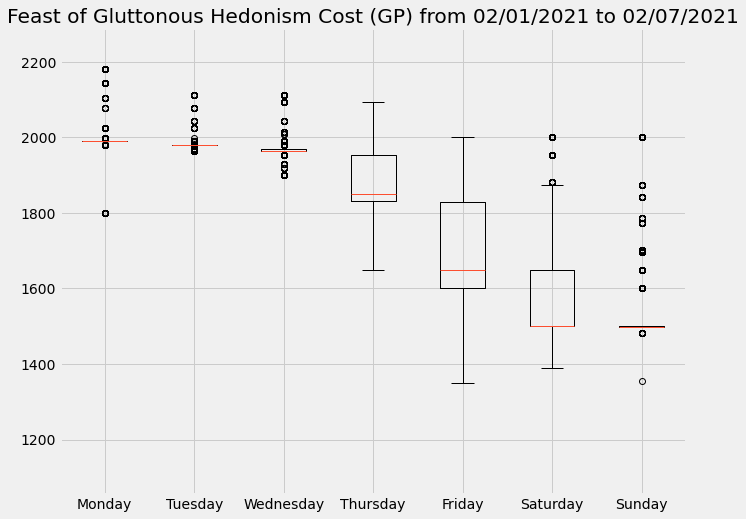

In [55]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

plt.boxplot(feastCost, labels = uniqueTimeDay)
plt.ylim(np.min(np.min(feastCost)) - 300,np.max(np.max(statsDaily)) + 300)
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Feast of Gluttonous Hedonism Cost (GP) from '+ str(weekBegin)[-5:-3] + '/' + str(weekBegin)[-2:]+ '/' + str(weekBegin)[-10:-6] + ' to ' + str(weekEnd)[-5:-3] + '/' + str(weekEnd)[-2:]+ '/' + str(weekEnd)[-10:-6])
plt.show()

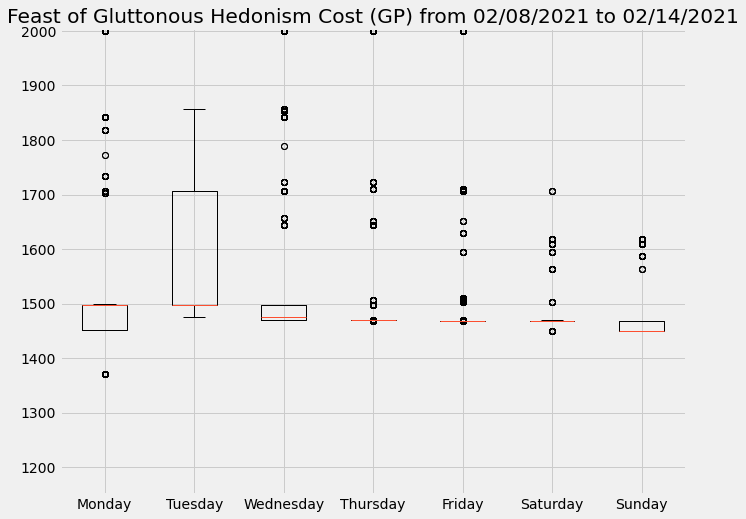

In [57]:
plt.boxplot(feastCost, labels = uniqueTimeDay)
plt.ylim(np.min(np.min(feastCost)) - 300,np.max(np.max(statsDaily)) + 300)
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Feast of Gluttonous Hedonism Cost (GP) from '+ str(weekBegin)[-5:-3] + '/' + str(weekBegin)[-2:]+ '/' + str(weekBegin)[-10:-6] + ' to ' + str(weekEnd)[-5:-3] + '/' + str(weekEnd)[-2:]+ '/' + str(weekEnd)[-10:-6])
plt.show()

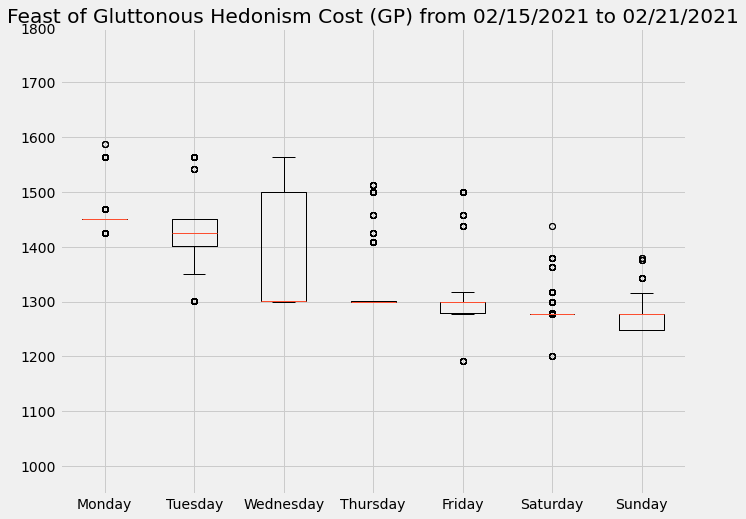

In [62]:
plt.boxplot(feastCost, labels = uniqueTimeDay)
plt.ylim(np.min(np.min(feastCost)) - 300,np.max(np.max(statsDaily)) + 300)
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Feast of Gluttonous Hedonism Cost (GP) from '+ str(weekBegin)[-5:-3] + '/' + str(weekBegin)[-2:]+ '/' + str(weekBegin)[-10:-6] + ' to ' + str(weekEnd)[-5:-3] + '/' + str(weekEnd)[-2:]+ '/' + str(weekEnd)[-10:-6])
plt.show()

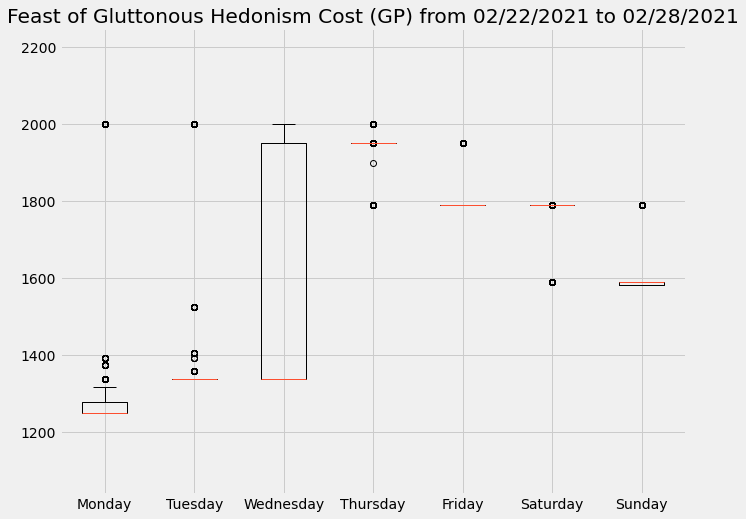

In [64]:
plt.boxplot(feastCost, labels = uniqueTimeDay)
plt.ylim(np.min(np.min(feastCost)) - 300,np.max(np.max(statsDaily)) + 300)
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Feast of Gluttonous Hedonism Cost (GP) from '+ str(weekBegin)[-5:-3] + '/' + str(weekBegin)[-2:]+ '/' + str(weekBegin)[-10:-6] + ' to ' + str(weekEnd)[-5:-3] + '/' + str(weekEnd)[-2:]+ '/' + str(weekEnd)[-10:-6])
plt.show()

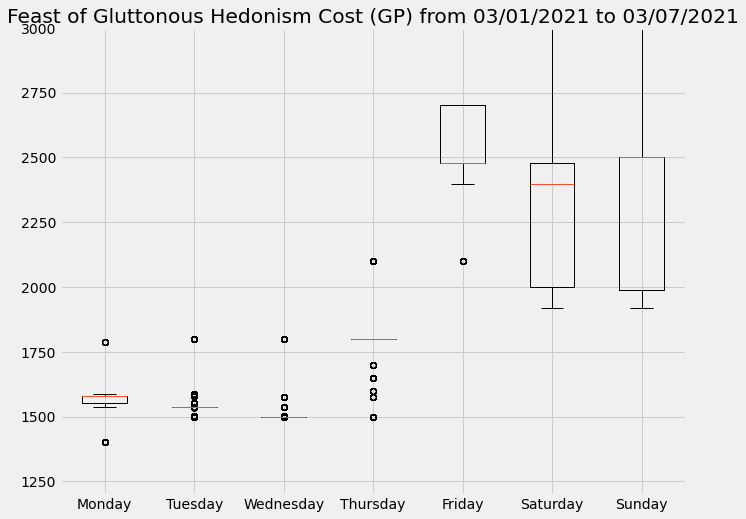

In [68]:
plt.boxplot(feastCost, labels = uniqueTimeDay)
plt.ylim(np.min(np.min(feastCost)) - 300,np.max(np.max(statsDaily)) + 300)
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Feast of Gluttonous Hedonism Cost (GP) from '+ str(weekBegin)[-5:-3] + '/' + str(weekBegin)[-2:]+ '/' + str(weekBegin)[-10:-6] + ' to ' + str(weekEnd)[-5:-3] + '/' + str(weekEnd)[-2:]+ '/' + str(weekEnd)[-10:-6])
plt.show()